In [91]:
import os
import fileinput
import csv

import numpy as np

import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.cm as cm
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [92]:
class cdat:
    def __init__(self):
        self.name = ''
        self.idx = []
        self.dte = []
        self.con = []
        self.rec = []
        self.ded = []
        self.gf = []
    def gfactor(self):
        if len(self.gf) == 0:
            self.gf = np.zeros_like(self.idx, dtype=float)
            for i in range(1,len(self.idx)):
                if(self.con[i-1] > 0):
                    self.gf[i] = float(self.con[i])/float(self.con[i-1])
        return self.gf

def readdata_wrd(path, dest):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
    #             print(row)
                dest.idx.append(line_count)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[1]))
                dest.ded.append(int(row[3]))
        print(f'Processed {line_count} lines.')
    dest.name = 'World'
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

def readdata_cnt(path, dest, cntname):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            elif row[1] == cntname:
    #             print(row)
                dest.idx.append(line_count)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[2]))
                dest.ded.append(int(row[4]))
#                 print(d, row[2])
            else:
                pass
        print(f'Processed {line_count} lines.')
    dest.name=cntname
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [93]:
clist = []

In [94]:
clist.append(cdat())
readdata_wrd('../data/worldwide-aggregated.csv', clist[-1])

for c in ['Poland', 'Italy', 'US', 'Germany', 'Spain', 'France', 'Japan']:
    clist.append(cdat())
    readdata_cnt('../data/countries-aggregated.csv', clist[-1], c)


Processed 71 lines.
Processed 71 lines.
Processed 71 lines.
Processed 71 lines.
Processed 71 lines.
Processed 71 lines.
Processed 71 lines.
Processed 71 lines.


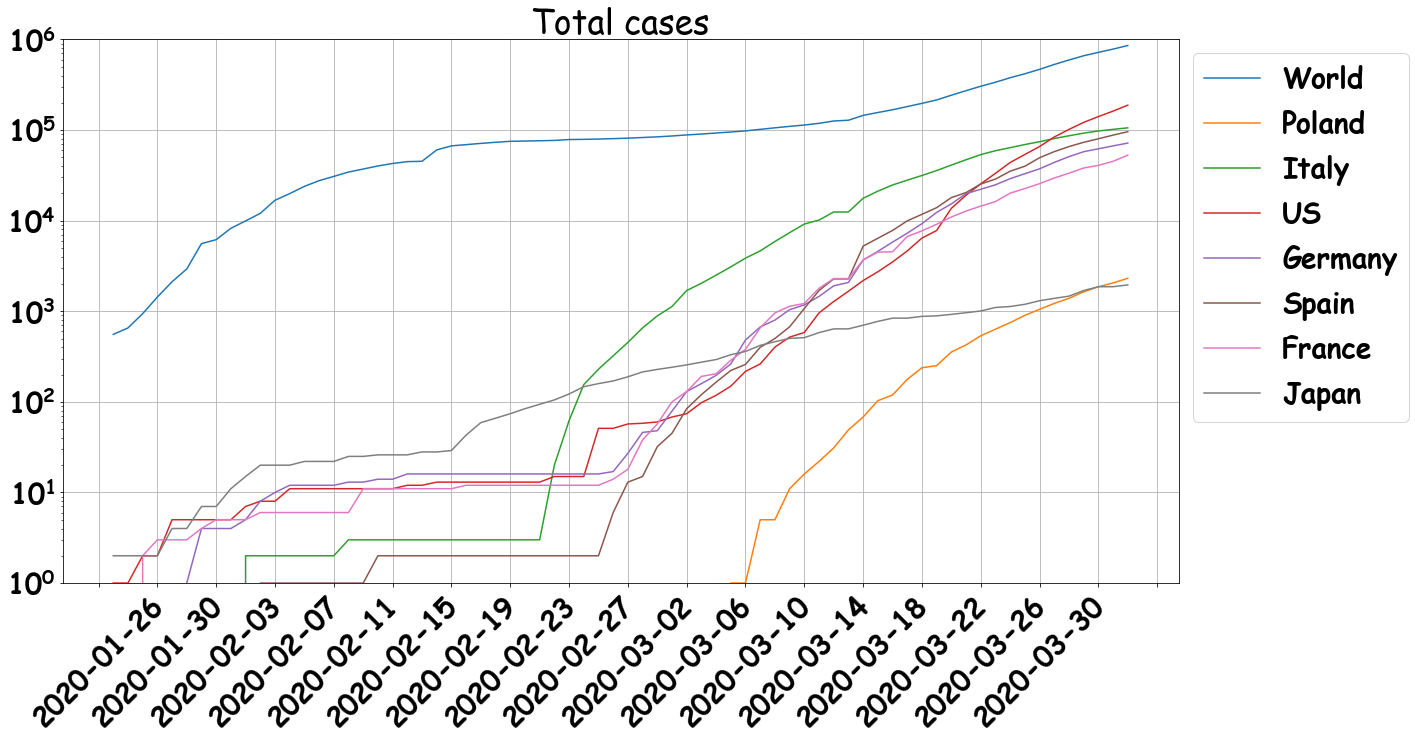

In [110]:
%matplotlib inline
font = {'family' : 'Comic Sans MS',
        'weight' : 'bold',
        'size'   : 28}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.con, label=c.name)
    
plt.title('Total cases')
plt.yscale('log')
plt.ylim(1,1e6)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
base = 4
loc = plticker.MultipleLocator(base=base) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels(clist[0].dte[::base], rotation=45)

plt.grid()

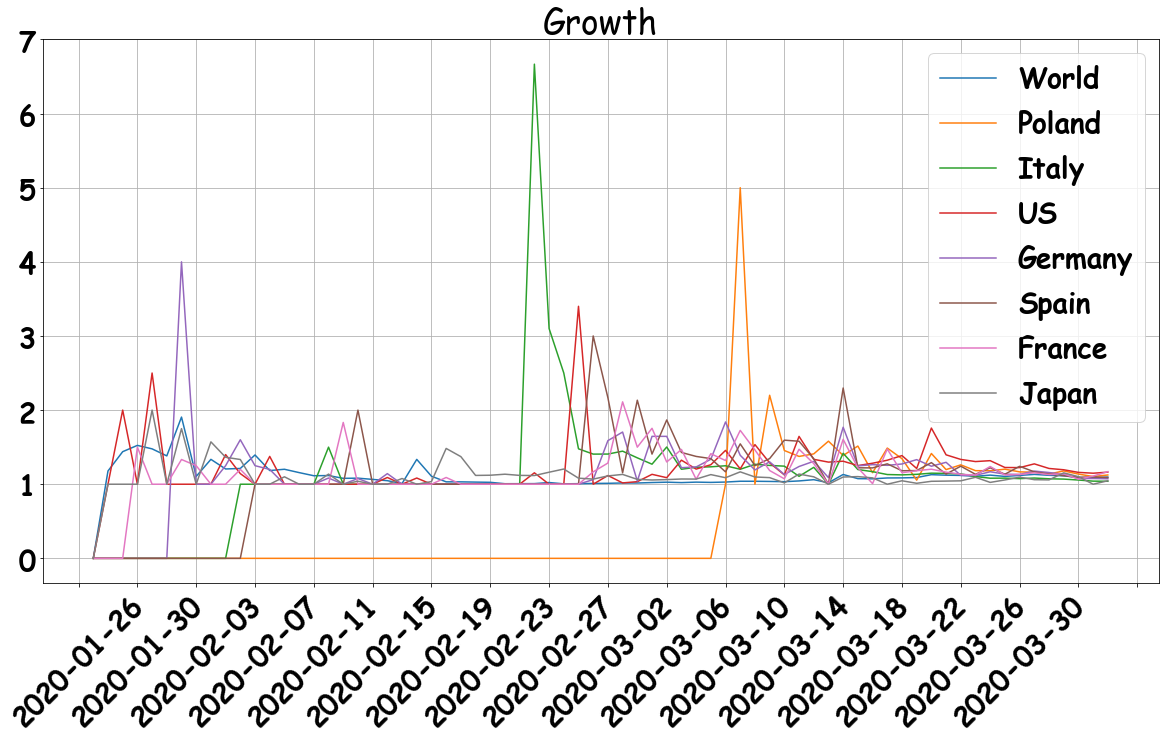

In [112]:
fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
# plt.yscale('log')
# plt.ylim(1,1e6)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
base = 4
loc = plticker.MultipleLocator(base=base) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels(clist[0].dte[::base], rotation=45)

plt.grid()

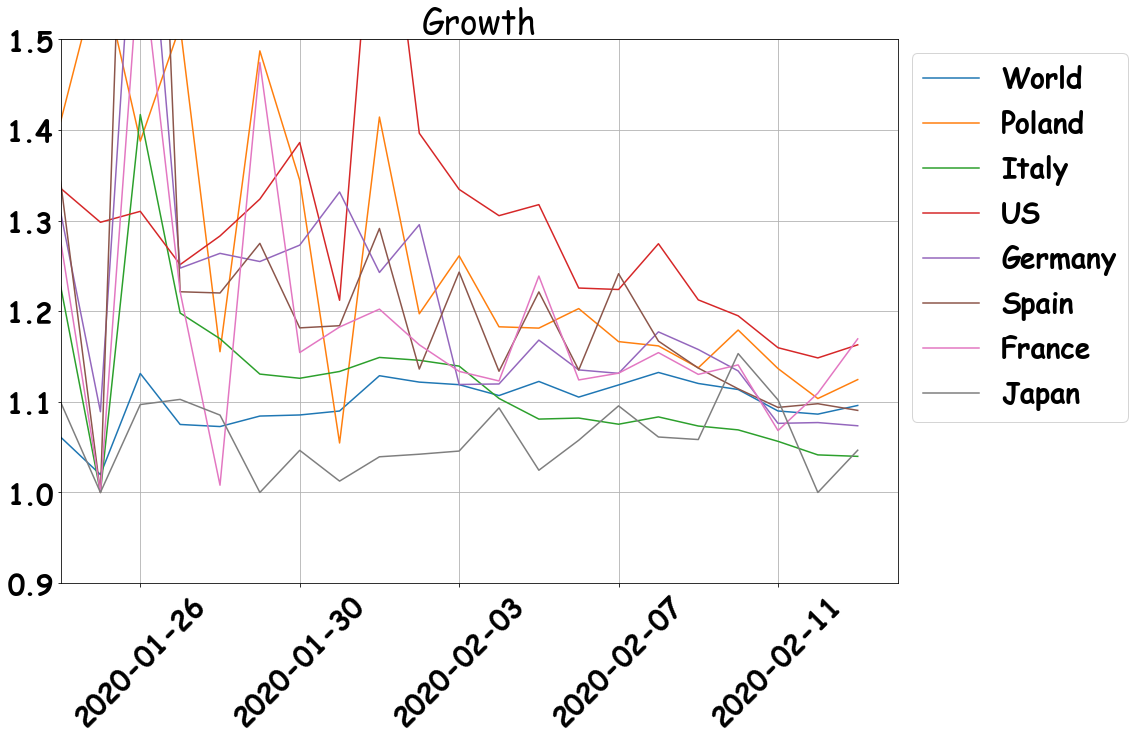

In [116]:
fig, ax = plt.subplots(figsize=(15,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(clist[0].idx[-21], clist[0].idx[-1]+1)
plt.ylim(0.9,1.5)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
base = 4
loc = plticker.MultipleLocator(base=base) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels(clist[0].dte[::base], rotation=45)

plt.grid()

In [117]:
for d in clist:
    av = np.mean([x for x in d.gf if x])
    print(d.name, av)

World 1.1206049806602985
Poland 1.4227282852644563
Italy 1.2860399622572283
US 1.2275473392531728
Germany 1.2285170237524847
Spain 1.2573548328602464
France 1.1839652333564163
Japan 1.1151990229218225


In [120]:
for d in clist:
    av = np.mean([x for x in d.gf[-7:] if x])
    print(d.name, av)

World 1.108200358450112
Poland 1.1442955042954954
Italy 1.062686390432969
US 1.1967550648211027
Germany 1.1182367496475722
Spain 1.134646875672068
France 1.1292187211519622
Japan 1.0738921050481411


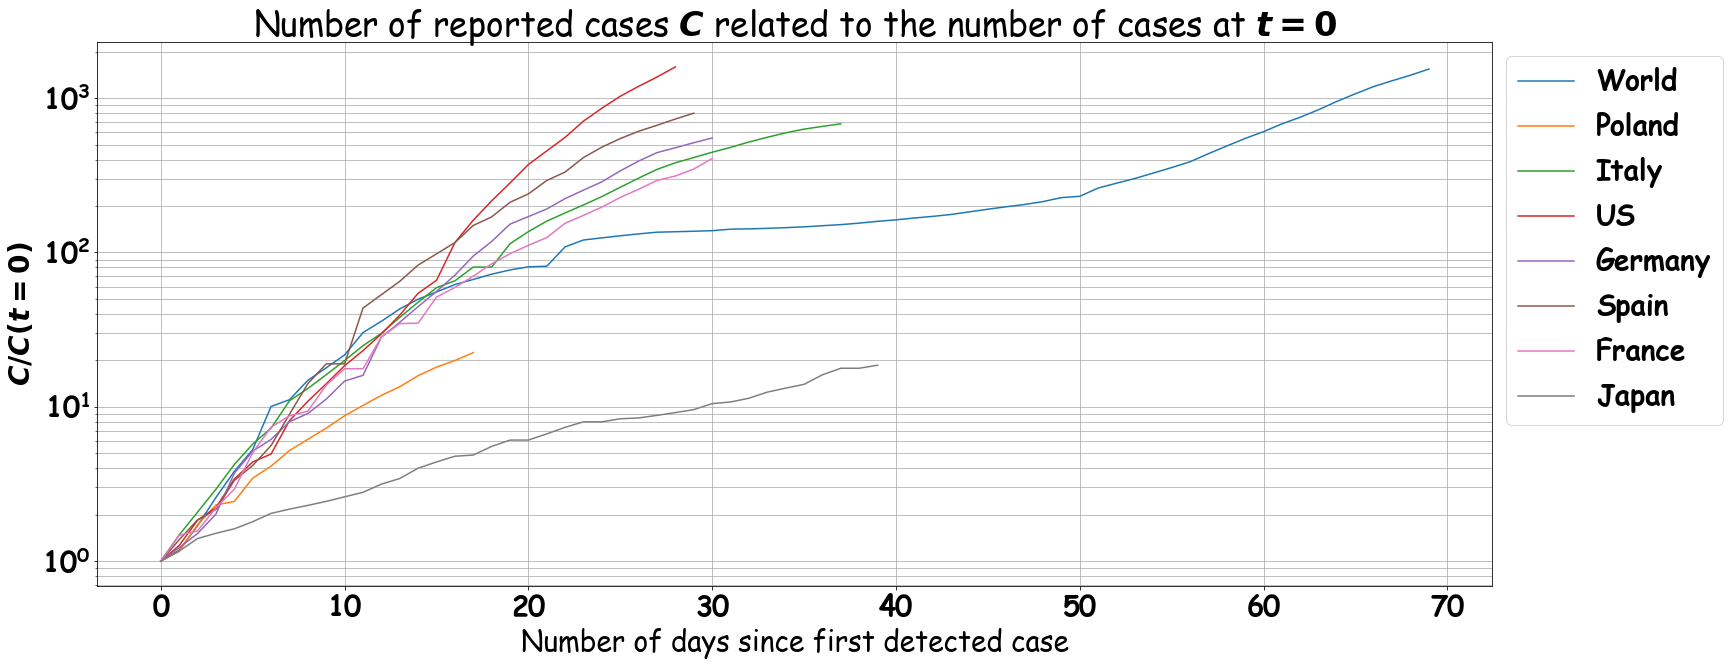

In [107]:
fig, ax = plt.subplots(figsize=(25,10))

for c in clist:
    con = np.array([x for x in c.con if x > 100])
    con = con/con[0]
    idx = range(0,len(con))
    plt.plot(idx, con, label=c.name)

plt.title('Number of reported cases $C$ related to the number of cases at $t=0$')
plt.xlabel('Number of days since first detected case')
plt.ylabel('$C/C(t=0)$')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
plt.grid(which='both')

In [121]:
c = clist[1]
idx1 = next(i for i,x in enumerate(c.con) if x > 10)
idx2 = next(i for i,x in enumerate(c.con) if x > 100)
print(idx2-idx1)
idx1 = next(i for i,x in enumerate(c.con) if x > 100)
idx2 = next(i for i,x in enumerate(c.con) if x > 1000)
print(idx2-idx1)

6
11
